In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Project Aim
In this guided project, we use use plotting tools to build and explore data on job outcomes.
we will

1. Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
2. Use a box plot to explore the distributions of median salaries and unemployment rate.
3. Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

# Exploring the Dataset

In [2]:
grades = pd.read_csv("recent-grads.csv")
grades.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
grades.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
grades.columns


Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [5]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [6]:
grades.describe(include="all")

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,PETROLEUM ENGINEERING,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [7]:
grades.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

The code below enables us to drop rows with missing values

In [8]:
grades = grades.dropna()
grades


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


# The scatter plots below shows the relationships that exists between two different columns

<AxesSubplot:xlabel='Sample_size', ylabel='Median'>

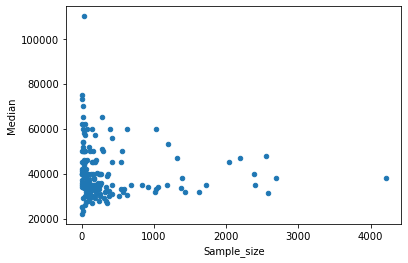

In [9]:
grades.plot.scatter("Sample_size", "Median")

<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>

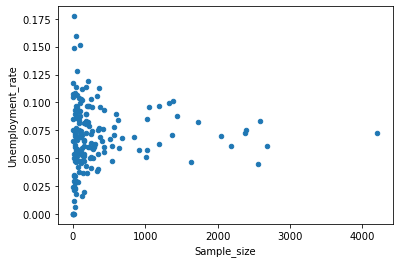

In [10]:
grades.plot.scatter("Sample_size", "Unemployment_rate")

<AxesSubplot:xlabel='Full_time', ylabel='Median'>

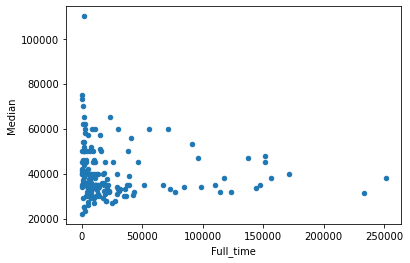

In [11]:
grades.plot.scatter("Full_time", "Median")

<AxesSubplot:xlabel='ShareWomen', ylabel='Unemployment_rate'>

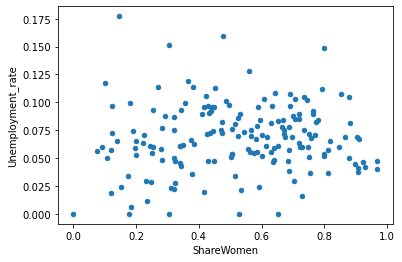

In [12]:
grades.plot.scatter("ShareWomen", "Unemployment_rate")

<AxesSubplot:xlabel='Men', ylabel='Median'>

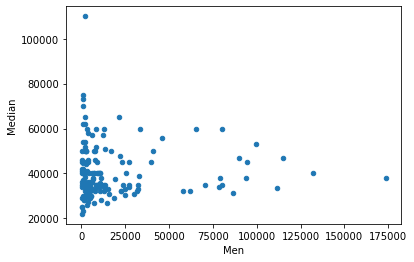

In [13]:
grades.plot.scatter("Men", "Median")

<AxesSubplot:xlabel='Women', ylabel='Median'>

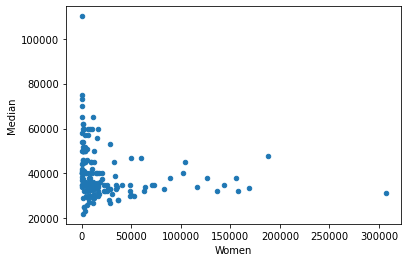

In [14]:
grades.plot.scatter("Women", "Median")

# The following Histograms shows the distributions of columns

<AxesSubplot:ylabel='Frequency'>

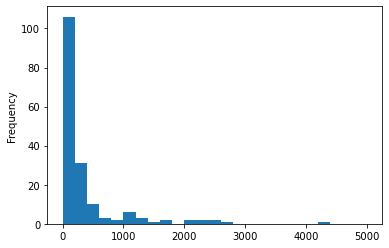

In [15]:
grades["Sample_size"].plot.hist(bins=25, range=(0, 5000))

<AxesSubplot:ylabel='Frequency'>

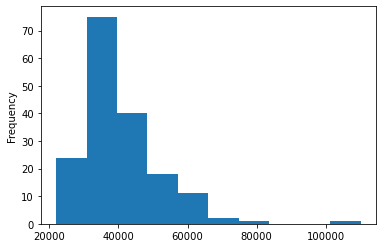

In [16]:
grades["Median"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

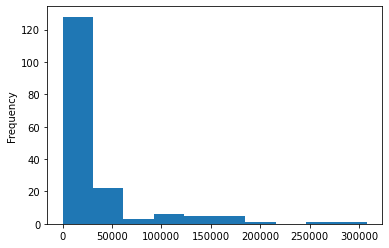

In [17]:
grades["Employed"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

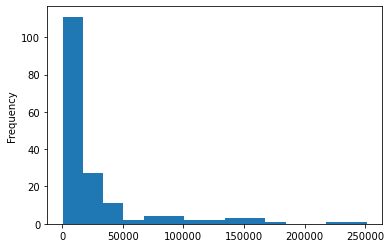

In [18]:
grades["Full_time"].plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

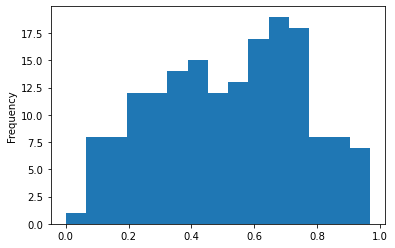

In [19]:
grades["ShareWomen"].plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

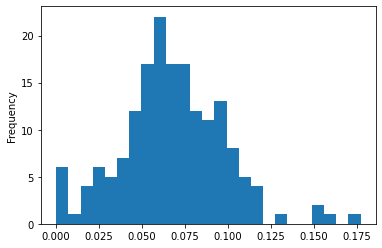

In [20]:
grades["Unemployment_rate"].plot.hist(bins=25)

<AxesSubplot:ylabel='Frequency'>

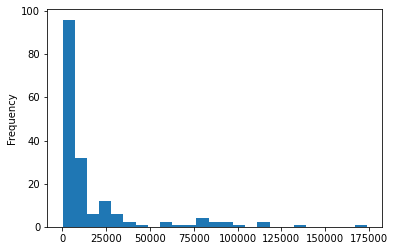

In [21]:
grades["Men"].plot.hist(bins=25)

<AxesSubplot:ylabel='Frequency'>

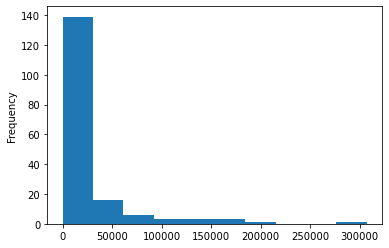

In [22]:
grades["Women"].plot.hist(bins=10)

# The scatter plot shows relationships between the columns

In [23]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

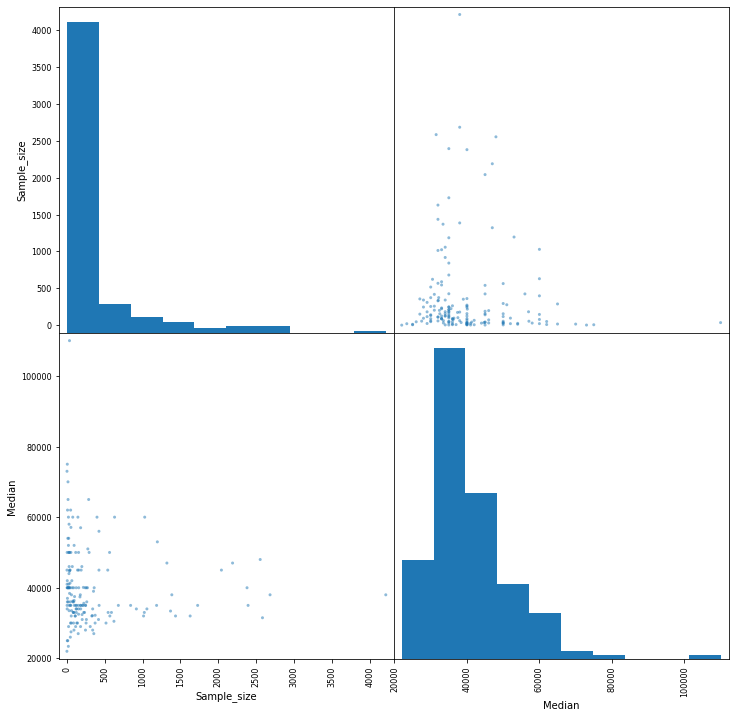

In [24]:
scatter_matrix(grades[['Sample_size', 'Median']],
               figsize=(12,12))

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

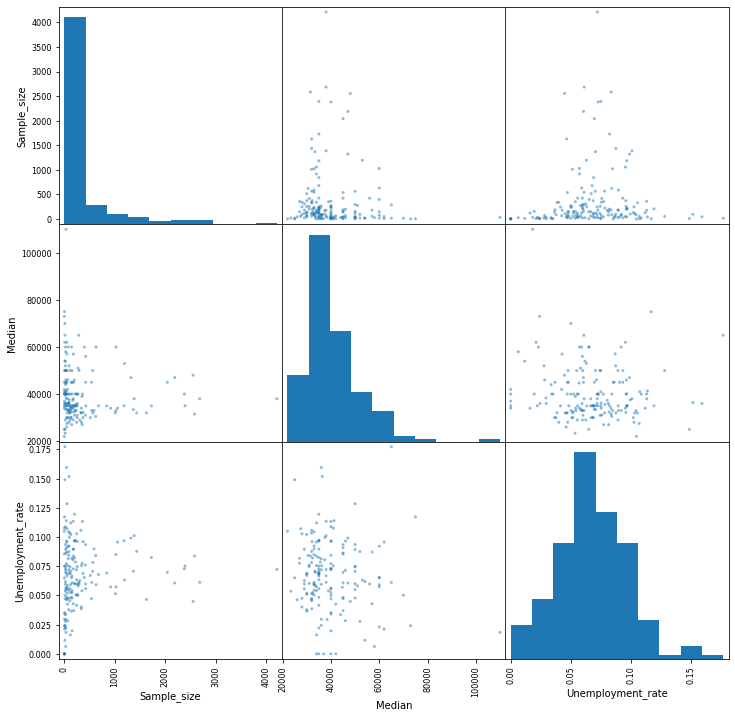

In [25]:
scatter_matrix(grades[['Sample_size', 'Median', 'Unemployment_rate']],
               figsize=(12,12))

# The bar plots visualizes the percentage relashionship of majors

<AxesSubplot:xlabel='Major'>

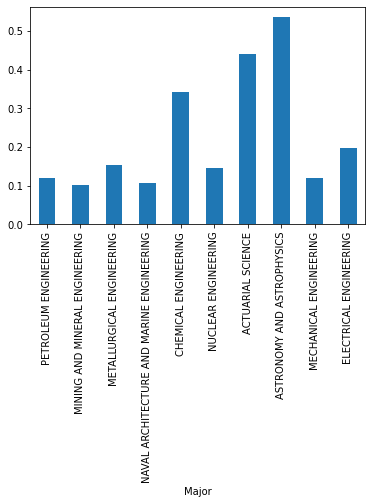

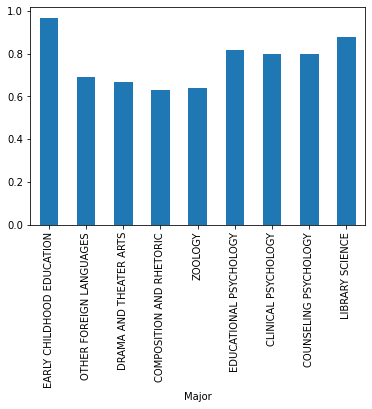

In [26]:
grades[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
grades[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

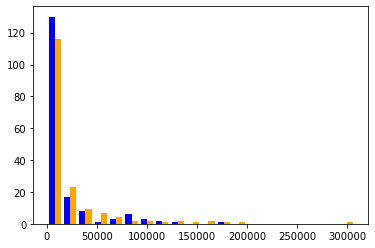

In [27]:
plt.hist([grades['Men'], grades['Women']], bins=20,
         color=['blue', 'orange'])
plt.show()